In [2]:
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [3]:
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.dates as mdates

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

C:\Users\cbush\AppData\Local\Temp\ipykernel_22564\4196587217.py:4: SADeprecationWarning: The AutomapBase.prepare.reflect parameter is deprecated and will be removed in a future release.  Reflection is enabled when AutomapBase.prepare.autoload_with is passed.
  Base.prepare(engine, reflect=True)


In [7]:
# View all of the classes that automap found
print(Base.classes.keys())

['station', 'measurement']


In [8]:
# Save references to each table
measure = Base.classes.measurement
staTion = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [10]:
# Find the most recent date in the data set.
newestDate = session.query(measure.date).order_by(measure.date.desc()).first()
print(newestDate)

('2017-08-23',)


2016-08-23


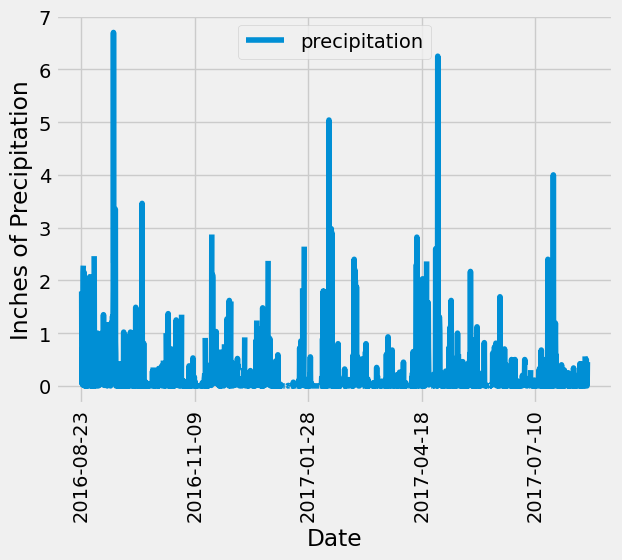

In [12]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
# Calculate the date one year from the last date in data set.
oneYearAgo = dt.date(2017,8,23) - dt.timedelta(days=365)
print(oneYearAgo)

# Perform a query to retrieve the data and precipitation scores
queryResults = (
    session.query(measure.date, measure.prcp).filter(measure.date >= oneYearAgo).all()
)
 
# Save the query results as a Pandas DataFrame. Explicitly set the column names
queryResultsdf = pd.DataFrame(queryResults, columns=["date", "precipitation"])

# Ensure the 'date' column is in datetime format and sorted
queryResultsdf.sort_values("date", inplace=True)

queryResultsdf.plot(x='date', y='precipitation', rot=90)
plt.xlabel("Date")
plt.ylabel("Inches of Precipitation")
plt.show()

In [19]:
# Use Pandas to calculate the summary statistics for the precipitation data
queryResultsdf.describe()


,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [85]:
# Design a query to calculate the total number of stations in the dataset
stationNum = session.query(func.count(staTion.station)).distinct().scalar()
print(stationNum)

9


In [89]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
mostActive = (session.query(measure.station, func.count(measure.id).label("count"))\
                            .group_by(measure.station)\
                            .order_by(func.count(measure.id).desc())\
                            .all()
)

for station, count in mostActive:
    print(f"Station: {station}, Count: {count}")

Station: USC00519281, Count: 2772
Station: USC00519397, Count: 2724
Station: USC00513117, Count: 2709
Station: USC00519523, Count: 2669
Station: USC00516128, Count: 2612
Station: USC00514830, Count: 2202
Station: USC00511918, Count: 1979
Station: USC00517948, Count: 1372
Station: USC00518838, Count: 511


In [21]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
mostActiveStation = "USC00519281"

tempData = (
    session.query(
        func.min(measure.tobs).label("min_temp"),
        func.max(measure.tobs).label("max_temp"),
        func.avg(measure.tobs).label("avg_temp"),
    ).filter(measure.station == mostActiveStation)\
    .all()
)
print(tempData)

[(54.0, 85.0, 71.66378066378067)]


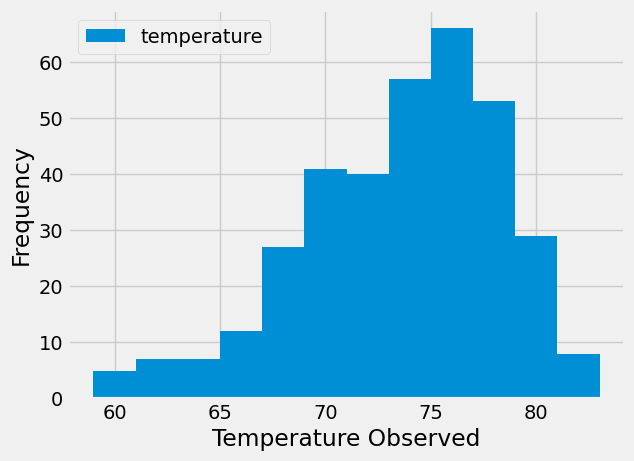

In [23]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
tempData2 = (
    session.query(measure.tobs)
    .filter(measure.station == mostActiveStation)
    .filter(measure.date >= oneYearAgo)
    .all()
)

# Convert the query results to a Pandas DataFrame
df = pd.DataFrame(tempData2, columns=["temperature"])

# Plot the data as a histogram
df.plot.hist(bins=12)
plt.tight_layout
plt.xlabel('Temperature Observed')
plt.ylabel('Frequency')
plt.show()


# Close Session

In [98]:
# Close Session
session.close()